In [ ]:
# for Google Colab only: Mount my Google Drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [1]:
pwd

'/home/ringoshin/Projects/z - learning/0 - Kaplan/proj/snaug'

In [ ]:
# for Google Colab only: Navigate to my snaug project folder
cd 'My Drive/snaug'

In [2]:
#
# Train models on cloud platforms using GPU, then save only the model weights 
# to be reloaded later on machines without powerful GPU.
#

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

import string
import textwrap
import pickle

from lib.nlplstm_class import (TFModelLSTMCharToken, TFModelLSTMWordToken, 
                               TFModelLSTMWord2vec) 
from lib.data_common import (load_doc, save_doc, clean_doc, prepare_char_tokens)
from lib.data_common import (build_token_lines, prepare_text_tokens, load_word2vec)

Using TensorFlow backend.


In [3]:
pathfinder_textfile = './data/textgen_pathfinder.txt'
fixed_length_token_textfile = './data/pathfinder_fixed-length_tokens.txt'

# 
# Loading, saving and pre-processing of the text data source for 
# character tokenisation
#
# load document
text = load_doc(pathfinder_textfile).lower()

In [4]:
# tokenize character data and separate into features and target for LSTM training
maxlen = 40
step = 3
X, y, char2indices, indices2char, num_unique_char = prepare_char_tokens(text, maxlen, step)

corpus length: 76633
total chars: 57
number of sequences: 25531
number of next_chars: 25531


In [5]:
# save the mappings
pickle.dump(char2indices, open('./model/pathfinder_chartoken_char2indices.pkl', 'wb'))
pickle.dump(indices2char, open('./model/pathfinder_chartoken_indices2char.pkl', 'wb'))

In [6]:
# create new object that is an LSTM model using character tokenization
# to generate text
textgen_model_1 = TFModelLSTMCharToken(use_gpu=False)

# define and compile the model parameters
textgen_model_1.define(maxlen, num_unique_char)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
# LSTM object sanity check
print(textgen_model_1.model_name)
print(textgen_model_1.have_gpu)
print(textgen_model_1.use_cudadnn)
print(textgen_model_1.model.summary())

Character Tokenisation
True
False
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 40, 512)           1167360   
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 512)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 57)                29241     
_________________________________________________________________
activation_1 (Activation)    (None, 57)                0         
Total params: 3,295,801
Trainable params: 3,295,801
Non-trainable params: 0
__________

In [8]:
# compile model
textgen_model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
#history = textgen_model_1.fit(X, y, batch_size=128, epochs=50)
history = textgen_model_1.fit(X, y, batch_size=128, epochs=2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2





25531/25531 [==============================] - 38s 1ms/step - loss: 2.9770 - acc: 0.1795
Epoch 2/2
25531/25531 [==============================] - 36s 1ms/step - loss: 2.5248 - acc: 0.2921


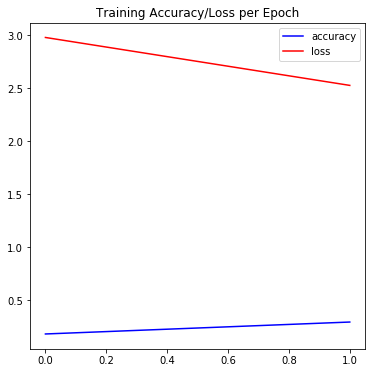

In [9]:
# plot accuracy vs error for training
textgen_model_1.plot_training()

In [10]:
# serialize model weights to HDF5 and save model training history
textgen_model_1.save_weights_and_history(fname_prefix="./model/pathfinder_chartoken_model_50_epoch")